# Random Decompositions and the Johnson-Lindenstrauss Lemma

### Why random decompositions?

As the SVD group can tell you, the Eckart-Young Theorem states that the first $k$ terms of the SVD represent the _best_ rank $k$ approximation to a matrix $A$. If this is case, why bother using randomized methods?

As the dimensions of $A$ become large, the SVD becomes difficult to compute. Let $A\in \mathbb{R}^{m\times n}$. The computational complexity of SVD is $O\left(\text{min}\{m^2n,n^2m\}\right)$. 

When the dimension of our data, $n$, becomes very large, we may exploit the phenomenon of _concentration of measure_ (i.e. Johnson-Lindenstrauss Lemma) in order to save computation time 

In [1]:
import numpy as np
from numpy import random
import math
from matplotlib import pyplot as plt
from scipy import misc
import scipy
from rputil import *

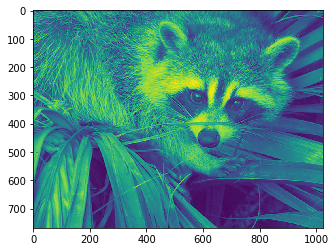

In [2]:
face = misc.face()
data = face[:,:,0] / 255
plt.imshow(data)

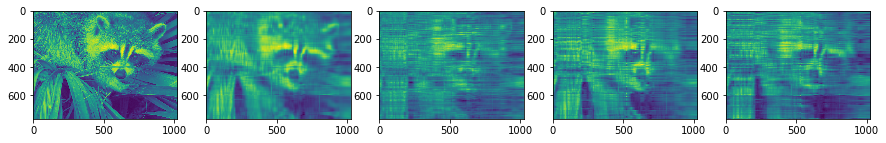

In [3]:
fig, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(data)
ax[1].imshow(svd_rank_k(data, 10))
ax[2].imshow(random_svd_rank_k(data, 10))
ax[3].imshow(id_rank_k(data, 10))
ax[4].imshow(random_id_rank_k(data, 10, 15))

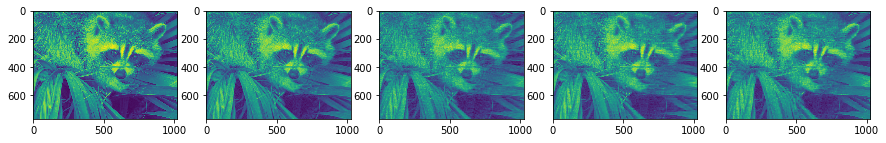

In [4]:
fig, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(data)
ax[1].imshow(svd_rank_k(data, 100))
ax[2].imshow(random_svd_rank_k(data, 100))
ax[3].imshow(id_rank_k(data, 100))
ax[4].imshow(random_id_rank_k(data, 100, 101))

In [5]:
k_domain = np.array([8,16,32,64,128,256])
error_svd = np.empty(k_domain.shape[0])
error_id = np.empty(k_domain.shape[0])

for i,val in enumerate(k_domain):
    error_svd[i] = np.linalg.norm(data - svd_rank_k(data, val)) / np.linalg.norm(data)
    error_id[i] = np.linalg.norm(data - id_rank_k(data, val)) / np.linalg.norm(data)
    


In [25]:
# for random procedures, calculate mean and IQR

error_random_svd = np.empty((7,k_domain.shape[0]))
error_random_id = np.empty((7, k_domain.shape[0]))

iterations = 100

for i,val in enumerate(k_domain):
    err_rsvd = np.empty(iterations)
    err_rid = np.empty(iterations)

    for j in range(iterations):
        err_rsvd[j] = np.linalg.norm(data - random_svd_rank_k(data, val)) / np.linalg.norm(data)
        err_rid[j] = np.linalg.norm(data - random_id_rank_k(data, val, val+10)) / np.linalg.norm(data)
    error_random_svd[0][i] = np.quantile(err_rsvd, 0.25)
    error_random_svd[1][i] = np.median(err_rsvd)
    error_random_svd[2][i] = np.quantile(err_rsvd, 0.75)
    error_random_svd[3][i] = np.mean(err_rsvd)
    error_random_svd[4][i] = np.std(err_rsvd)
    error_random_svd[5][i] = np.min(err_rsvd)
    error_random_svd[6][i] = np.max(err_rsvd)

    error_random_id[0][i] = np.quantile(err_rid, 0.25)
    error_random_id[1][i] = np.median(err_rid)
    error_random_id[2][i] = np.quantile(err_rid, 0.75)
    error_random_id[3][i] = np.mean(err_rid)
    error_random_id[4][i] = np.std(err_rid)
    error_random_id[5][i] = np.min(err_rid)
    error_random_id[6][i] = np.max(err_rid)


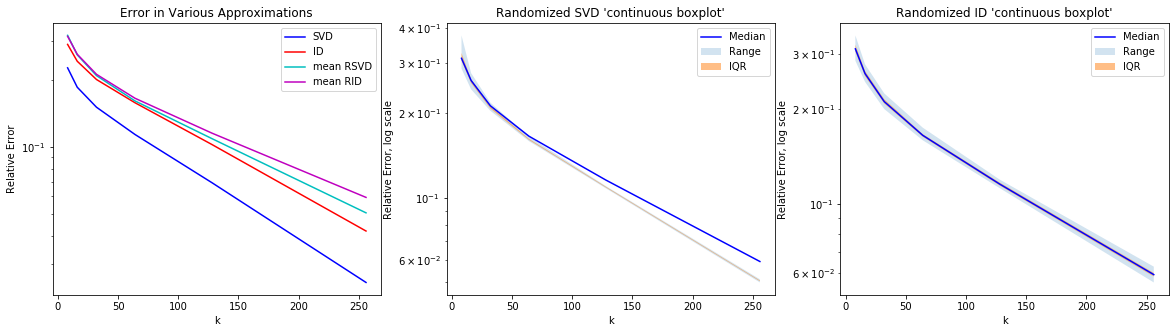

In [26]:
# Mean errors on the same graph
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(k_domain, error_svd, c='b', label='SVD')
ax[0].plot(k_domain, error_id, c='r', label='ID')
ax[0].plot(k_domain, error_random_svd[3], c='c', label='mean RSVD')
ax[0].plot(k_domain, error_random_id[3], c='m', label='mean RID')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Relative Error')
ax[0].set_yscale('log')
ax[0].legend(loc='upper right')
ax[0].set_title('Error in Various Approximations')

ax[1].plot(k_domain, error_random_id[1], c='b', label='Median')
ax[1].fill_between(k_domain, error_random_svd[5],error_random_svd[6], alpha=0.2, label='Range')
ax[1].fill_between(k_domain, error_random_svd[0],error_random_svd[2], alpha=0.5, label='IQR')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Relative Error, log scale')
ax[1].set_yscale('log')
ax[1].legend(loc='upper right')
ax[1].set_title('Randomized SVD \'continuous boxplot\'')

ax[2].plot(k_domain, error_random_id[1], c='b', label='Median')
ax[2].fill_between(k_domain, error_random_id[5],error_random_id[6], alpha=0.2, label='Range')
ax[2].fill_between(k_domain, error_random_id[0],error_random_id[2], alpha=0.5, label='IQR')
ax[2].set_xlabel('k')
ax[2].set_ylabel('Relative Error, log scale')
ax[2].set_yscale('log')
ax[2].legend(loc='upper right')
ax[2].set_title('Randomized ID \'continuous boxplot\'')

plt.show()